In [3]:
import os
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
os.chdir(r'C:\SML_Projects\SML_CVE_type_cwe_predict')

In [5]:
df = pd.read_csv("data/preprocessed/preprocessed_dataset.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102963 entries, 0 to 102962
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   cve_id                      102963 non-null  float64
 1   description                 102963 non-null  float64
 2   cvss_score                  102963 non-null  float64
 3   cwe                         102963 non-null  float64
 4   vendor                      102963 non-null  float64
 5   product                     102963 non-null  float64
 6   publish_date                102963 non-null  float64
 7   type                        102963 non-null  float64
 8   vendor_freq                 102963 non-null  float64
 9   product_freq                102963 non-null  float64
 10  desc_len                    102963 non-null  float64
 11  desc_word_count             102963 non-null  float64
 12  desc_num_count              102963 non-null  float64
 13  desc_upper_rat

In [7]:
targets = ['type', 'cvss_score']
X = df.drop(columns=targets, errors='ignore')
y = df[targets]

In [8]:
model = joblib.load('pipeline/final_pipeline.joblib')  

y_pred = model.predict(X)
y_pred_df = pd.DataFrame(y_pred, columns=targets)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

for i, target in enumerate(targets):
    print(f"\n===== {target.upper()} =====")
    print(f"Accuracy: {accuracy_score(y[target], y_pred_df[target]):.3f}")
    print(classification_report(y[target], y_pred_df[target]))


===== TYPE =====
Accuracy: 0.989
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1286
         1.0       1.00      1.00      1.00      2498
         2.0       0.95      0.98      0.97      5582
         3.0       0.99      0.99      0.99      9978
         4.0       0.99      0.99      0.99     43243
         5.0       0.99      0.99      0.99      2616
         6.0       0.98      1.00      0.99      2010
         7.0       0.98      0.97      0.97      7232
         8.0       1.00      1.00      1.00      8014
         9.0       0.99      1.00      0.99       991
        10.0       1.00      0.99      0.99     19513

    accuracy                           0.99    102963
   macro avg       0.99      0.99      0.99    102963
weighted avg       0.99      0.99      0.99    102963


===== CVSS_SCORE =====
Accuracy: 0.757
              precision    recall  f1-score   support

         0.0       0.71      0.45      0.55      9674
    

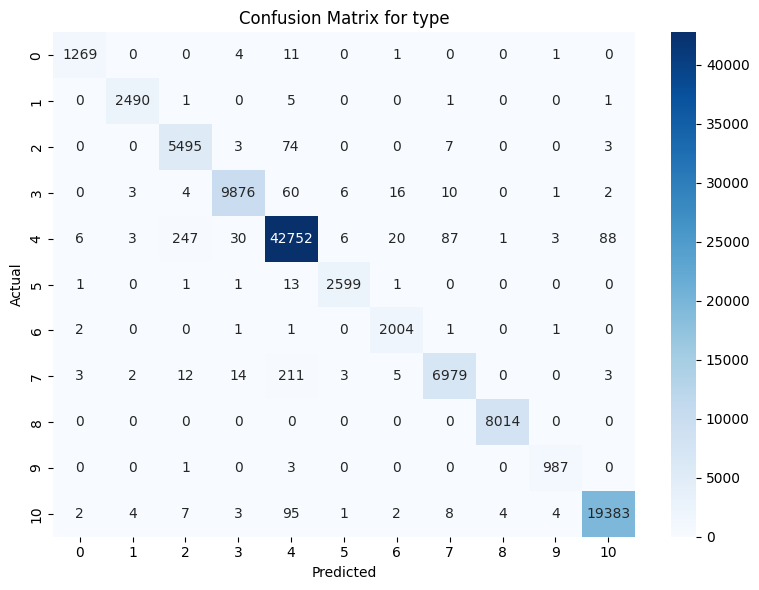

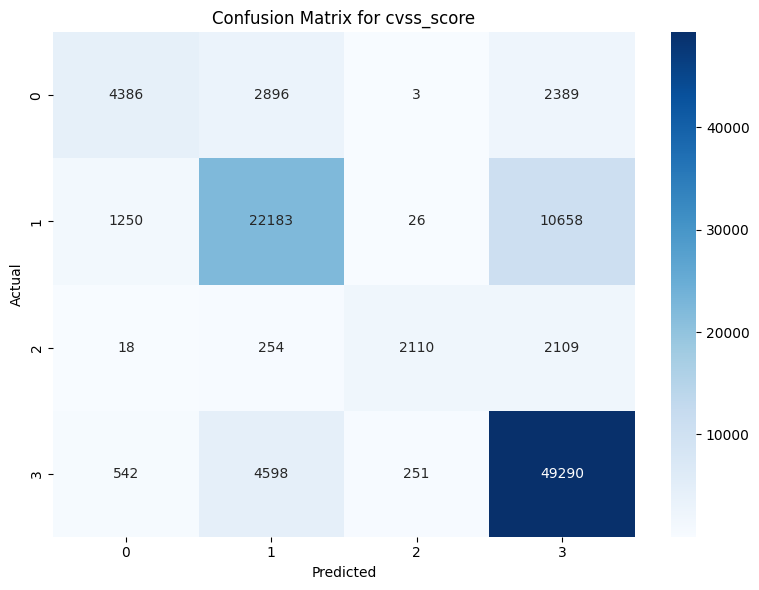

In [10]:
for target in targets:
    cm = confusion_matrix(y[target], y_pred_df[target])
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {target}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

In [11]:
for target in targets:
    misclassified = df[y[target] != y_pred_df[target]].copy()
    misclassified[f'{target}_predicted'] = y_pred_df[target][y[target] != y_pred_df[target]]
    print(f"\n{target} da xatoliklar soni: {len(misclassified)}")
    print(misclassified[[target, f'{target}_predicted']].head(10))


type da xatoliklar soni: 1115
      type  type_predicted
323    7.0             2.0
476   10.0             2.0
483    4.0             2.0
499    5.0             6.0
679   10.0             4.0
688    4.0             2.0
712    3.0             4.0
759    2.0             4.0
920   10.0             4.0
1025   4.0             2.0

cvss_score da xatoliklar soni: 24994
    cvss_score  cvss_score_predicted
3          3.0                   1.0
5          1.0                   3.0
8          1.0                   0.0
11         1.0                   3.0
13         0.0                   3.0
23         1.0                   3.0
27         1.0                   3.0
29         1.0                   3.0
56         0.0                   3.0
72         1.0                   3.0


In [12]:
for target in targets:
    errors = (y[target] != y_pred_df[target]).groupby(y[target]).sum()
    print(f"\nTop chalkashishlar {target}:")
    print(errors.sort_values(ascending=False).head(10))


Top chalkashishlar type:
type
4.0     491
7.0     253
10.0    130
3.0     102
2.0      87
5.0      17
0.0      17
1.0       8
6.0       6
9.0       4
Name: type, dtype: int64

Top chalkashishlar cvss_score:
cvss_score
1.0    11934
3.0     5391
0.0     5288
2.0     2381
Name: cvss_score, dtype: int64


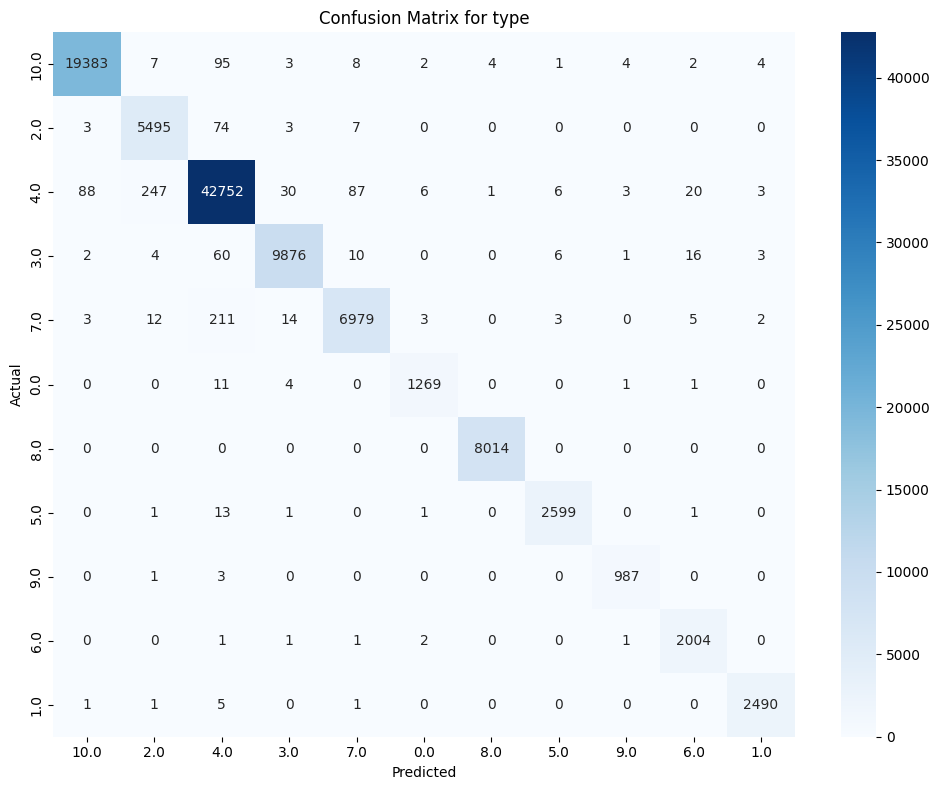

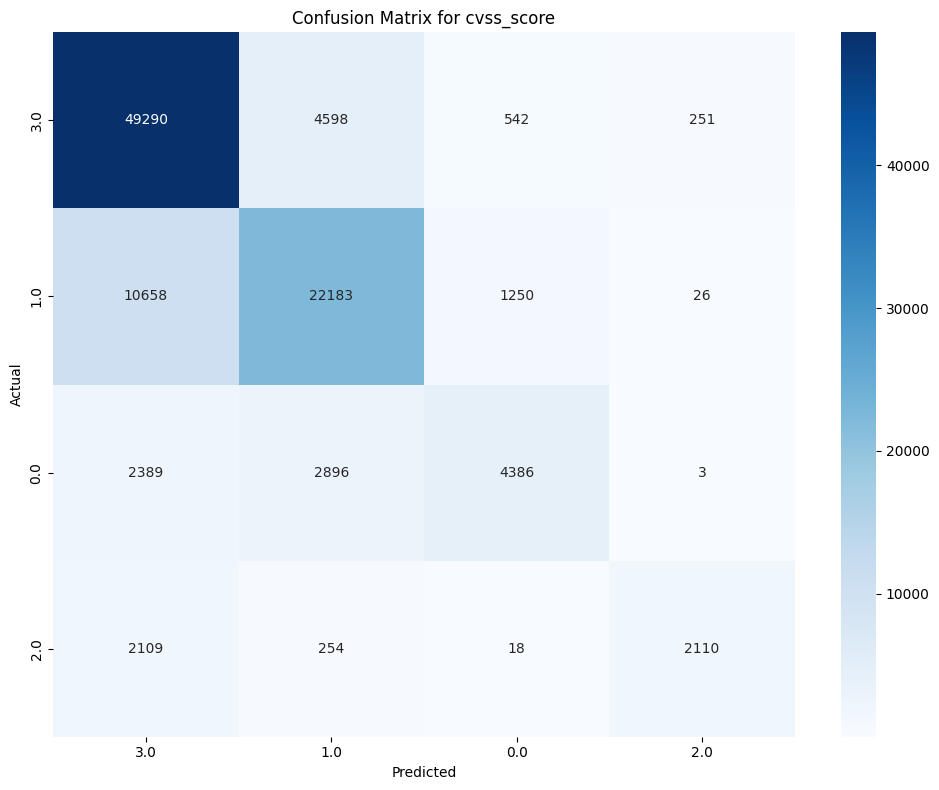

In [13]:
for i, target in enumerate(targets):
    cm = confusion_matrix(y[target], y_pred_df[target], labels=y[target].unique())
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=y[target].unique(), 
                yticklabels=y[target].unique())
    plt.title(f"Confusion Matrix for {target}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

In [14]:
for target in targets:
    misclassified = df[y[target] != y_pred_df[target]].copy()
    misclassified[f'{target}_predicted'] = y_pred_df[target][y[target] != y_pred_df[target]]
    print(f"\n{target} da xatoliklar soni: {len(misclassified)}")
    display(misclassified[[target, f'{target}_predicted']].head(10))


type da xatoliklar soni: 1115


,type,type_predicted
323,7.0,2.0
476,10.0,2.0
483,4.0,2.0
499,5.0,6.0
679,10.0,4.0
688,4.0,2.0
712,3.0,4.0
759,2.0,4.0
920,10.0,4.0
1025,4.0,2.0



cvss_score da xatoliklar soni: 24994


,cvss_score,cvss_score_predicted
3,3.0,1.0
5,1.0,3.0
8,1.0,0.0
11,1.0,3.0
13,0.0,3.0
23,1.0,3.0
27,1.0,3.0
29,1.0,3.0
56,0.0,3.0
72,1.0,3.0


C:\Users\user\AppData\Local\Temp\ipykernel_9836\2464406002.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=errors.index, y=errors.values, palette='coolwarm')


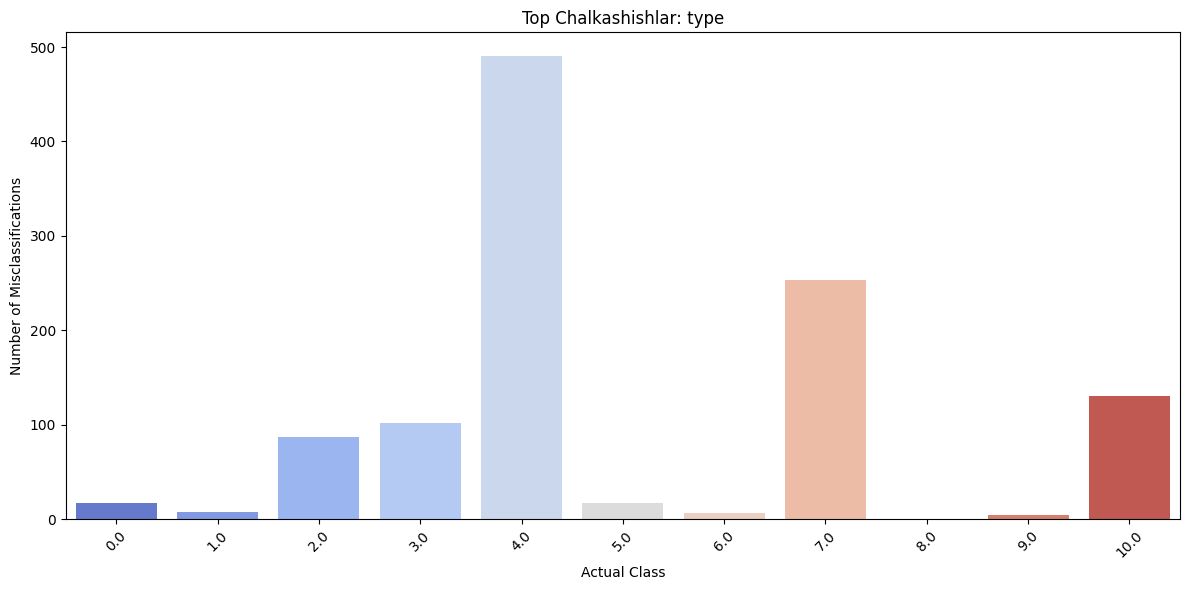

C:\Users\user\AppData\Local\Temp\ipykernel_9836\2464406002.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=errors.index, y=errors.values, palette='coolwarm')


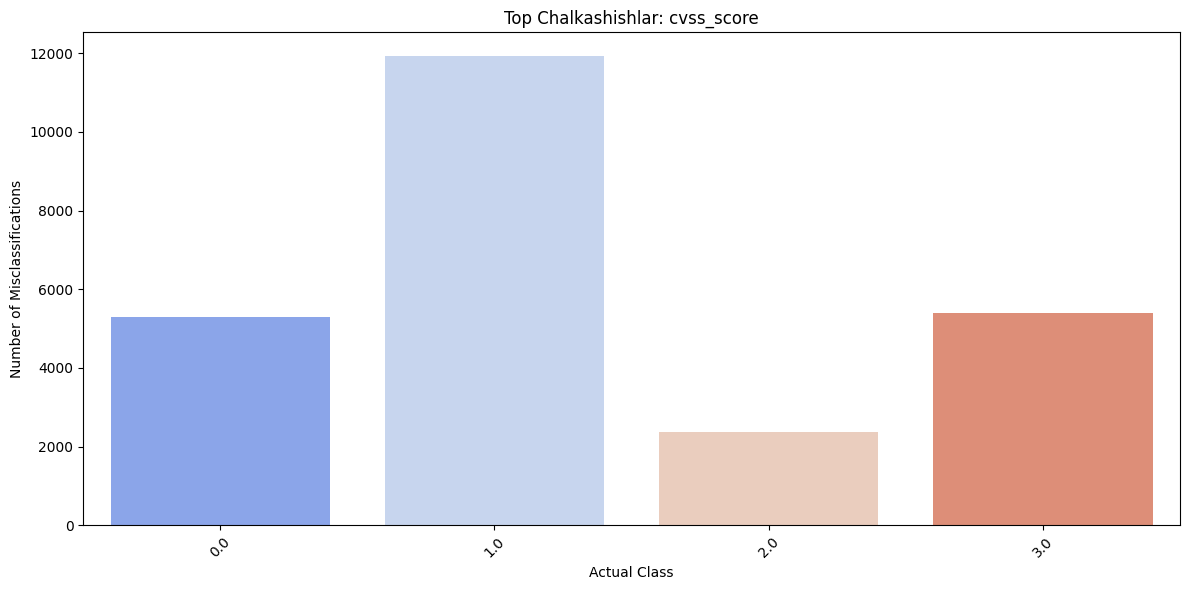

In [15]:
for target in targets:
    errors = (y[target] != y_pred_df[target]).groupby(y[target]).sum().sort_values(ascending=False)
    plt.figure(figsize=(12,6))
    sns.barplot(x=errors.index, y=errors.values, palette='coolwarm')
    plt.title(f"Top Chalkashishlar: {target}")
    plt.xlabel("Actual Class")
    plt.ylabel("Number of Misclassifications")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()